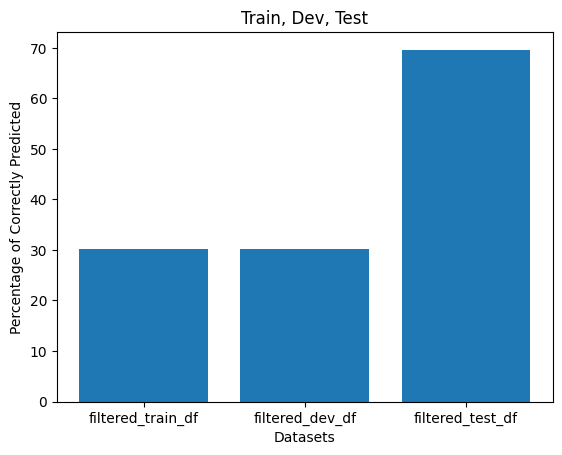

In [41]:
#1) dev, train --> corrected_sentence
#2) character error rate columns in the 3 DF
#3) Mean character error rate
#4) Cf accuracy, precision, error

# To read the excel file back
# df = pd.read_excel('file_name.xlsx')
import pandas as pd

#-------------------------------------------------------------------------------
#Chargement des DF à partir des fichiers excels
filtered_train_df = pd.read_excel('filtered_train_6953rows.xlsx')
# filtered_train_df
filtered_dev_df = pd.read_excel('filtered_dev_3481rows.xlsx')
# filtered_dev_df
filtered_test_df = pd.read_excel('filtered_test_3467rows.xlsx')
# filtered_test_df


filtered_train_df["correct_predicted"] = filtered_train_df.apply(lambda row: row['sentence'] == row['predicted_sentence'], axis=1)
filtered_dev_df["correct_predicted"] = filtered_dev_df.apply(lambda row: row['sentence'] == row['predicted_sentence'], axis=1)
# filtered_train_df

# Calculate the percentage of correct predictions
names_df = [filtered_train_df, filtered_dev_df, filtered_test_df]
names_df_string = ["filtered_train_df", "filtered_dev_df", "filtered_test_df"]
percentage_of_true_table = []
for name in names_df:
    percentage_of_true_table.append(100 * name['correct_predicted'].value_counts()[True] / name.shape[0])

# print(percentage_of_true_table) #[30.14526103840069, 30.278655558747488, 69.62792039226997]
#Bar plot
import matplotlib.pyplot as plt

#Create a bar plot of the 'char_error_rate' column
plt.bar(names_df_string, percentage_of_true_table)

# Add x and y labels
plt.xlabel('Datasets')
plt.ylabel('Percentage of Correctly Predicted')

# Add title
plt.title('Train, Dev, Test')

# Show the plot
plt.show()





In [64]:
# Define the desired answers
answers = ["yes", "no", "one", "two", "three", "four"]

# # Create an empty dictionary to store the percentages
percentages = {}

# Iterate through the desired answers
# for answer in answers:
#     name = filtered_train_df[filtered_train_df['sentence'] == answer]
#     percentages[answer] = 100 * name['correct_predicted'].value_counts()[True] / name.shape[0]

# percentages
# print(percentages)


# name = filtered_train_df[filtered_train_df['sentence'] == "yes"]
# name
# percentages["yes"] = 100 * name['correct_predicted'].value_counts()[True] / name.shape[0]

# percentages #{'yes': 89.94082840236686}

name = filtered_train_df[filtered_train_df['sentence'] == "one"]
name
unique_predicted_sentences = name['predicted_sentence'].unique()
unique_predicted_sentences

# name['correct_predicted'].value_counts()["True"]
# percentages["one"] = 100 * name['correct_predicted'].value_counts()[True] / name.shape[0]

# percentages #{'yes': 89.94082840236686}
#array(['1', 'morning', 'what',
    #    "<class 'speech_recognition.UnknownValueError'>", 'wine', 'van',
    #    '11', 'wait', 'when', 'Wham', 'want', 'why', 'run', 'Bond',
    #    'white', 'wind', 'wang', 'man', 'land', 'wire', 'weiner', 'born',
    #    'once', 'Watton', 'Warren', 'Wayne'], dtype=object)

#Il y a 0 "one"
#Transcrit automatique vers "1"!

#--->
#On va convertir et faire le tableau avec la correction
def convert_number(n):
    if n == "1":
        return "one"
    elif n == "2":
        return "two"
    elif n == "3":
        return "three"
    elif n == "4":
        return "four"
    else:
        return n

filtered_train_df['predicted_sentence'] = filtered_train_df['predicted_sentence'].apply(convert_number)
filtered_train_df["correct_predicted"] = filtered_train_df.apply(lambda row: row['sentence'] == row['predicted_sentence'], axis=1)

# filtered_train_df
for name in names_df:
    percentage_of_true_table.append(100 * name['correct_predicted'].value_counts()[True] / name.shape[0])

#Après nettoyage pour train, on passe de 30 à 75!
percentage_of_true_table #[30.14526103840069,30.278655558747488,69.62792039226997] --> [75.6220336545376, 30.278655558747488,69.62792039226997]

#--------------------------------------------------------------------------------------------------
#On recommence à générer le bar chart avec les percentage of true by answers
# Define the desired answers
answers = ["yes", "no", "one", "two", "three", "four"]

# # Create an empty dictionary to store the percentages
percentages = {}

# Iterate through the desired answers
for answer in answers:
    name = filtered_train_df[filtered_train_df['sentence'] == answer]
    percentages[answer] = 100 * name['correct_predicted'].value_counts()[True] / name.shape[0]

percentages
print(percentages)
#{'yes': 89.94082840236686, 'no': 88.50771869639794, 'one': 86.62150719729043, 'two': 67.53022452504318, 'three': 55.47511312217195, 'four': 64.13793103448276}




{'yes': 89.94082840236686, 'no': 88.50771869639794, 'one': 86.62150719729043, 'two': 67.53022452504318, 'three': 55.47511312217195, 'four': 64.13793103448276}


In [8]:
#Je m'en suis pas servi vraiment
#On peut supprimer?
import torch
# import our library
import torchmetrics

# preds = ["this is the prediction", "there is an other sample"]
# target = ["this is the reference", "there is another one"]
# char_error_rate(preds=preds, target=target)

# simulate a classification problem
preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10,))
# preds
acc = torchmetrics.functional.accuracy(preds, target, task='multiclass', num_classes=5)
acc

tensor([[0.0338, 0.1046, 0.1169, 0.0514, 0.6934],
        [0.1160, 0.4545, 0.1539, 0.0532, 0.2223],
        [0.1954, 0.0757, 0.4730, 0.2165, 0.0394],
        [0.0256, 0.0705, 0.3271, 0.1026, 0.4742],
        [0.1669, 0.2292, 0.1922, 0.2286, 0.1831],
        [0.1123, 0.2393, 0.2821, 0.1632, 0.2030],
        [0.0694, 0.1514, 0.4643, 0.2919, 0.0230],
        [0.3033, 0.1249, 0.3637, 0.1645, 0.0436],
        [0.2157, 0.1557, 0.1570, 0.3296, 0.1420],
        [0.2313, 0.1381, 0.2421, 0.0970, 0.2915]])

C:\Users\Simon\AppData\Local\Temp\ipykernel_10664\2835266889.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped = grouped.append(grouped[~grouped['sentence'].isin(order)].sort_values(by='sentence'), ignore_index=True)


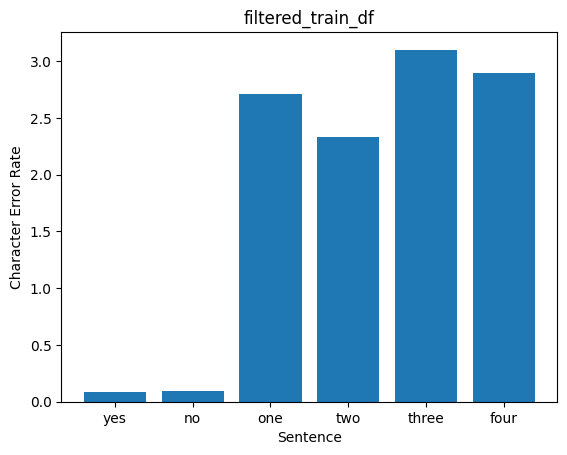

In [32]:
import pandas as pd
import torch
import torchmetrics

#Adding the column char_error_rate
filtered_train_df['char_error_rate'] = filtered_train_df.apply(lambda row: torchmetrics.functional.char_error_rate(row['sentence'], row['predicted_sentence']), axis=1)
filtered_train_df

# First convert the tensors to numbers
filtered_train_df['char_error_rate'] = filtered_train_df['char_error_rate'].apply(lambda x: x.item())

# Calculate the mean of the column
mean = filtered_train_df['char_error_rate'].mean()
# print(mean) #1.8549806161199767

filtered_train_df

# First convert the tensors to numbers
#Attention, une fois que l'on a converti, on ne peut plus reconvertir dans cette ligne de code entraine une erreur
# filtered_train_df['char_error_rate'] = filtered_train_df['char_error_rate'].apply(lambda x: x.item())

# Group by 'sentence' column and calculate the mean of 'char_error_rate' for each group
# grouped = filtered_train_df.groupby('sentence')['char_error_rate'].mean()

# sentence
# four     2.899915
# no       0.092736
# one      2.712156
# three    3.101123
# two      2.328530
# yes      0.084036


# Getting a Dataframe for grouped!
grouped = filtered_train_df.groupby('sentence')['char_error_rate'].mean().reset_index()
# grouped

# grouped
#     sentence	char_error_rate
# 0	four	    2.899915
# 1	no	        0.092736
# 2	one	        2.712156
# 3	three	    3.101123
# 4	two	        2.328530
# 5	yes	        0.084036

#order in this order ["yes", "no", "one", "two", "three", "four"]
# Define the desired order
order = ["yes", "no", "one", "two", "three", "four"]

# Reindex the grouped dataframe with the desired order
grouped = grouped.set_index('sentence').reindex(order).reset_index()

# Append the rest of the sentences to the end of the DataFrame
grouped = grouped.append(grouped[~grouped['sentence'].isin(order)].sort_values(by='sentence'), ignore_index=True)
grouped


#-------------------------------------------------------------------------------
#Bar plot
import matplotlib.pyplot as plt

#Create a bar plot of the 'char_error_rate' column
plt.bar(grouped['sentence'], grouped['char_error_rate'])

# Add x and y labels
plt.xlabel('Sentence')
plt.ylabel('Character Error Rate')

# Add title
plt.title('filtered_train_df')

# Show the plot
plt.show()

